# Results 100

## Purpose
* This notebook highlights the results of our analysis for research question 1.

### Datasets
* We used the atp_main dataset mainly for this question 
* Also reading in smaller dataframes created in Analysis 300 notebook while investigating player nationalities

In [1]:
#importing relevant libraries
import os
import sys
import hashlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

    
%matplotlib inline

In [2]:
# Open and read these three dataframes
atp_main = pd.read_csv("../data/atp_main", low_memory = False, index_col = 'tourney_date')

In [3]:
atp_main.index = pd.to_datetime(atp_main.index, format="%Y-%m-%d", errors='coerce')

In [4]:
atp_small = pd.read_csv("../data/atp_small", low_memory = False)

In [5]:
#reading in csv file for normalized nationalities of players 1968-1978
# created in analysis 300
rel_68_78 = pd.read_csv("../data/rel_68_78", low_memory = False)

In [6]:
#reading in csv file for normalized nationalities of players 2006-2016
rel_06_16 = pd.read_csv("../data/rel_06_16", low_memory = False)

In [7]:
#reading in csv file for Australian players for each year from 1968-2017
Aus = pd.read_csv("../data/Aus", low_memory = False)

In [8]:
early_years = atp_main['1990':'2000']

In [9]:
later_years = atp_main['2005':'2015']

# Length of matches 1990 - 2015

Here we can see that the length of matches is increasing. There are dips and spikes in the data but there is a general rise in match lengths as time goes on.

Text(0.5,1,'Line graph showing the increase in minutes per match 1990-2017')

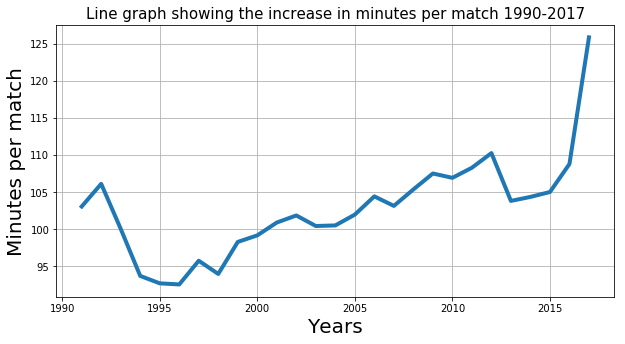

In [10]:
fig = plt.figure(figsize=(10,5))
plt.plot(atp_main['1990':'2017'].groupby(['match_year'])['minutes'].mean(), linewidth=4.0)
plt.xlabel('Years', fontsize=20)
plt.ylabel('Minutes per match', fontsize=20)
plt.grid(True)
plt.title('Line graph showing the increase in minutes per match 1990-2017', fontsize=15)

# The distribution of aces from 1990 - 2015

Investigating if the the distribution of the number of aces per player per match has changed over the last 2 decades 

Text(0.5,1,'Histogram showing distribution of aces 1990-2000')

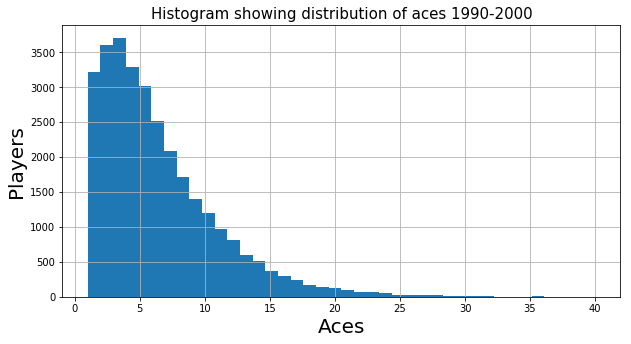

In [11]:

early_years['w_ace'].hist(bins=40, range=(1,40), figsize = (10,5))
plt.xlabel('Aces', fontsize=20)
plt.ylabel('Players', fontsize=20)
plt.grid(True)
plt.title('Histogram showing distribution of aces 1990-2000', fontsize=15)

Text(0.5,1,'Histogram showing distribution of aces 2005-2015')

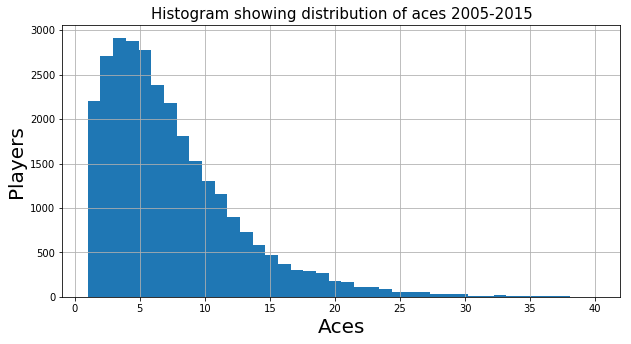

In [12]:

later_years['w_ace'].hist(bins=40, range=(1,40), figsize = (10,5))
plt.xlabel('Aces', fontsize=20)
plt.ylabel('Players', fontsize=20)
plt.grid(True)
plt.title('Histogram showing distribution of aces 2005-2015', fontsize=15)

There is no real difference in the average amount of aces from a player. Both histograms seem to spike at 4/5 aces which is a plausible result to comprehend.

# Aces on each surface 1990 - 2015

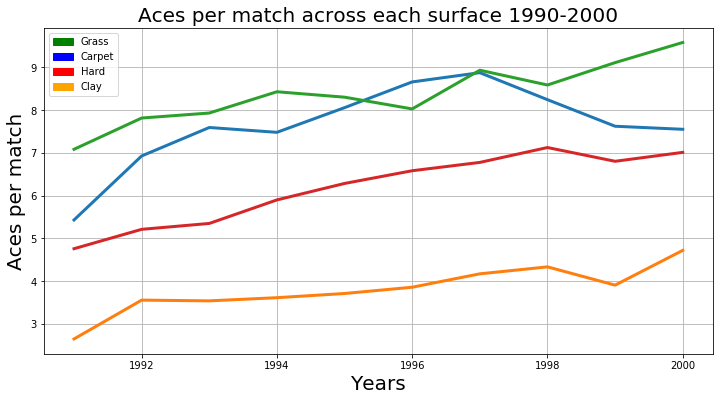

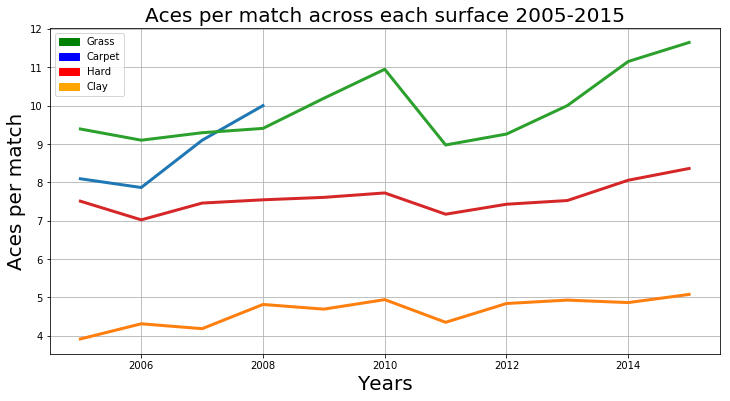

In [13]:
import matplotlib.patches as mpatches

# 1990 - 2000
fig = plt.figure(figsize=(12,6))
plt.plot(early_years.groupby(['surface', 'match_year'])['w_ace'].mean().unstack(0), linewidth=3)
plt.xlabel('Years', fontsize=20)
plt.ylabel('Aces per match', fontsize=20)
plt.grid(True)

plt.title('Aces per match across each surface 1990-2000', fontsize=20)

green_patch = mpatches.Patch(color='green', label='Grass')
blue_patch = mpatches.Patch(color='blue', label='Carpet')
red_patch = mpatches.Patch(color='red', label='Hard')
orange_patch = mpatches.Patch(color='orange', label='Clay')
plt.legend(handles=[green_patch, blue_patch, red_patch, orange_patch])

# 2005 - 2015
fig = plt.figure(figsize=(12,6))
plt.plot(later_years.groupby(['surface', 'match_year'])['w_ace'].mean().unstack(0), linewidth=3)
plt.xlabel('Years', fontsize=20)
plt.ylabel('Aces per match', fontsize=20)
plt.grid(True)
plt.title('Aces per match across each surface 2005-2015', fontsize=20)

green_patch = mpatches.Patch(color='green', label='Grass')
blue_patch = mpatches.Patch(color='blue', label='Carpet')
red_patch = mpatches.Patch(color='red', label='Hard')
orange_patch = mpatches.Patch(color='orange', label='Clay')
plt.legend(handles=[green_patch, blue_patch, red_patch, orange_patch])

We can see from the graphs that grass courts produce more aces and clay courts produce the least amouont of aces. Grass courts have a faster game as the ball bounces lower therefore passes back and forth would be faster as there is less time to get the ball. Clay courts are the opposite with the surface creating a higher bounce thus allowing more time to get to the ball and take your shot. It is also interesting to not carpet stops in 2008. It is being slowly fazed out of the sport due to dip in popualrity.

### Investigating correlation between height and aces in a match, on average

In [14]:
# Grouping by height and mean of aces for 1990-2000
avg_ace_ht_90s = atp_main['1990':'2000'].groupby(['winner_ht'])['w_ace'].mean()
avg_ace_ht_90s = pd.DataFrame(avg_ace_ht_90s).reset_index()
avg_ace_ht_90s.columns = ['height', 'ace_90s']

In [15]:
# Grouping by height and mean of aces for 2005-2015
avg_ace_ht_00s = atp_main['2000':'2015'].groupby(['winner_ht'])['w_ace'].mean()
avg_ace_ht_00s = pd.DataFrame(avg_ace_ht_00s).reset_index()
avg_ace_ht_00s.columns = ['height', 'ace_00s']

In [16]:
# Joining dataframes and sorting by height
frames = [avg_ace_ht_90s,avg_ace_ht_00s]
aces_vs_ht = pd.concat(frames)
aces_vs_ht.sort_values('height').head()

,ace_00s,ace_90s,height
0,NaN,NaN,160.0
0,6.493827,NaN,163.0
1,NaN,NaN,165.0
1,2.089686,NaN,168.0
2,NaN,1.173913,168.0


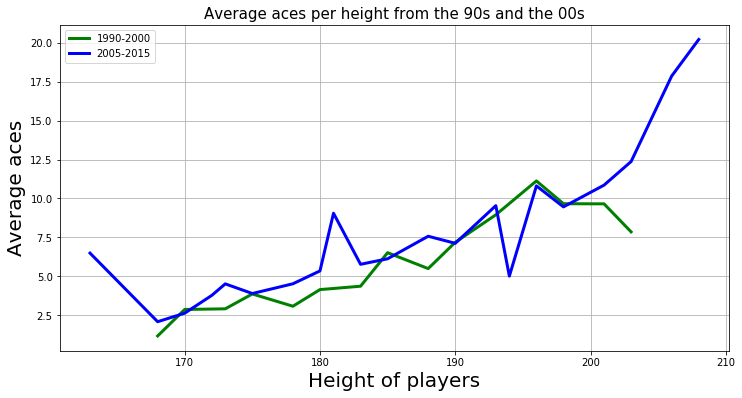

In [17]:
#Plotting line graph
fig = plt.figure(figsize=(12,6))
plt.plot( 'height', 'ace_90s', data=aces_vs_ht, color='green', linewidth=3, label='1990-2000')
plt.plot( 'height', 'ace_00s', data=aces_vs_ht, color='blue', linewidth=3, label='2005-2015')
plt.xlabel('Height of players', fontsize=20)
plt.ylabel('Average aces', fontsize=20)
plt.grid(True)
plt.title('Average aces per height from the 90s and the 00s', fontsize=15)
plt.legend()

We see an increase in average aces as height increases for both in both the 90's and the 00's. 

# Heights of tennis players 1968 - 2016

In [18]:
atp_main['1968':'1978'].groupby(['match_year'])['winner_ht'].mean()

match_year
1968.0    182.210158
1969.0    181.925187
1970.0    181.803700
1971.0    182.383489
1972.0    182.273545
1973.0    181.891586
1974.0    181.702810
1975.0    181.376388
1976.0    181.391304
1977.0    182.123551
1978.0    182.191913
Name: winner_ht, dtype: float64

In [19]:
atp_main['2006':'2016'].groupby(['match_year'])['winner_ht'].mean()

match_year
2006.0    184.937718
2007.0    185.230138
2008.0    185.784288
2009.0    186.003707
2010.0    186.160109
2011.0    186.558692
2012.0    186.697869
2013.0    187.076668
2014.0    187.065217
2015.0    187.177520
2016.0    186.867370
Name: winner_ht, dtype: float64

Text(0.5,1,'Development of Average Player Heights 2006-2016')

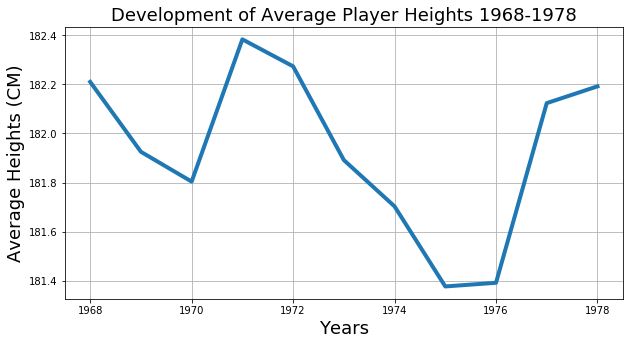

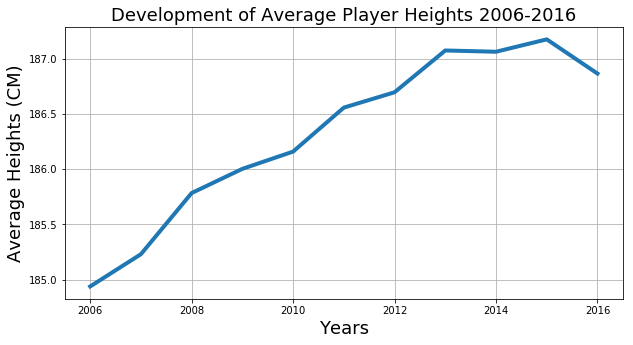

In [20]:
# 1968 - 1978
fig = plt.figure(figsize=(10,5))
plt.plot(atp_main['1968':'1978'].groupby(['match_year'])['winner_ht'].mean(), linewidth=4.0)
plt.xlabel('Years', fontsize=18)
plt.ylabel('Average Heights (CM)', fontsize=18)
plt.grid(True)
plt.title('Development of Average Player Heights 1968-1978', fontsize=18)

# 2006 - 2016
fig = plt.figure(figsize=(10,5))
plt.plot(atp_main['2006':'2016'].groupby(['match_year'])['winner_ht'].mean(), linewidth=4.0)
plt.xlabel('Years', fontsize=18)
plt.ylabel('Average Heights (CM)', fontsize=18)
plt.grid(True)
plt.title('Development of Average Player Heights 2006-2016', fontsize=18)

During 1968-1978 the average height of players fluctuated over 1cm over the 11 year period. During 2006-2016 there is a steady increase of 2cm over the 11 year period. We can conclude that on average tennis players are getting taller as the average heights has increased by 5cm from 182cm to 187cm over the 5 decades.

## Player Nationalities

#### Nationalities of players 1968 - 1978 

In [21]:
#sorting the table by descending order
no_players_68_78 = rel_68_78.sort_values('player_num', ascending=False)
no_players_68_78.head()

,winner_ioc,player_num,average_pop,pop_rel
19,USA,198,210.913956,0.938771
18,AUS,97,13.315630,7.284672
17,FRA,44,53.292658,0.825630
16,GBR,39,56.010238,0.696301
15,ESP,31,42.502060,0.729376


In [22]:
#sorting the table by descending order
rel_68_78 = rel_68_78.sort_values('pop_rel', ascending=False)
rel_68_78.head()

,winner_ioc,player_num,average_pop,pop_rel
18,AUS,97,13.315630,7.284672
4,NZL,14,2.955318,4.737223
12,SWE,24,8.143423,2.947164
2,SUI,11,6.258093,1.757724
6,CZE,17,10.470653,1.623585


Text(0.5,1,'Bar Chart showing normalised number of players per country 1968-1978')

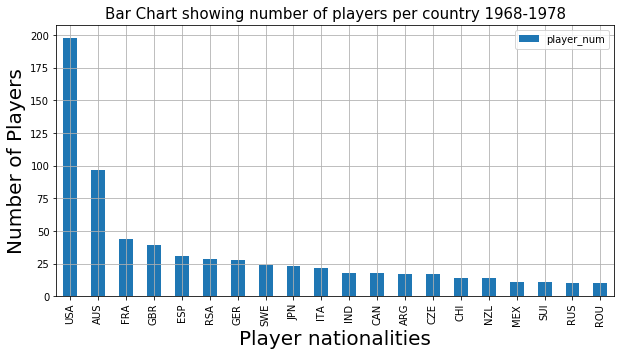

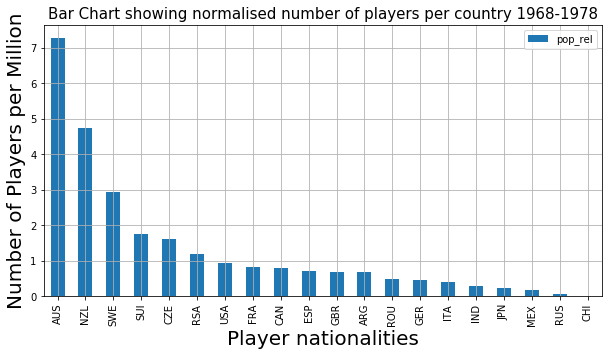

In [23]:
#plotting bar chart for number of players per country 1968-1978
no_players_68_78.plot(x = 'winner_ioc', y = 'player_num', kind = 'bar', figsize = (10,5))
plt.xlabel('Player nationalities', fontsize=20)
plt.ylabel('Number of Players', fontsize=20)
plt.grid(True)
plt.title('Bar Chart showing number of players per country 1968-1978', fontsize=15)

#plotting bar chart for normalized number of players per country 1968-1978
rel_68_78.plot(x = 'winner_ioc', y = 'pop_rel', kind = 'bar', figsize = (10,5))
plt.xlabel('Player nationalities', fontsize=20)
plt.ylabel('Number of Players per Million', fontsize=20)
plt.grid(True)
plt.title('Bar Chart showing normalised number of players per country 1968-1978', fontsize=15)

In 1968-1978, the USA had a notably larger production of winning players in the early years, producing nearly 200 players whereas all the other countries are below the 100 mark.
<br> When we normalized the number of players per million per country we found interesting results. Australia’s had a staggering 7 players per million and Australia’s neighbour, New Zealand, had nearly 5 players per million. All the other countries have less than half this number at the 3 player mark.

#### Player nationalities 2006 2016

In [24]:
#sorting the table by descending order
no_players_06_16 = rel_06_16.sort_values('player_num', ascending=False)
no_players_06_16.head()

,winner_ioc,player_num,average_pop,pop_rel
19,USA,62,311.298094,0.199166
18,FRA,50,65.333179,0.765308
17,ESP,43,42.502060,1.011716
16,ARG,35,41.235810,0.848777
15,GER,35,81.461219,0.429652


In [25]:
#sorting the table by descending order
rel_06_16 = rel_06_16.sort_values('pop_rel', ascending=False)
rel_06_16.head()

,winner_ioc,player_num,average_pop,pop_rel
5,CRO,15,4.262103,3.519389
2,SVK,12,5.402596,2.221154
11,CZE,21,10.470653,2.005606
6,AUT,15,8.461710,1.772691
7,SWE,15,9.567811,1.567757


Text(0.5,1,'Bar Chart showing normalized number of players per country 2006-2016')

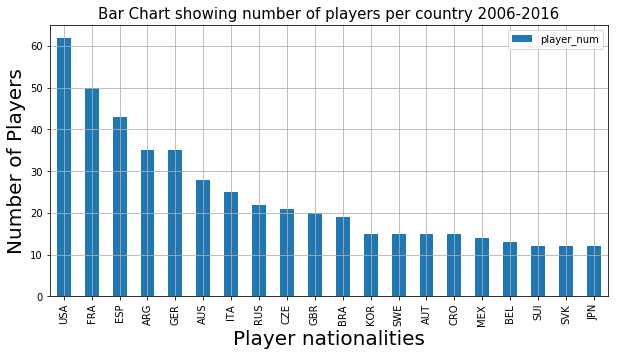

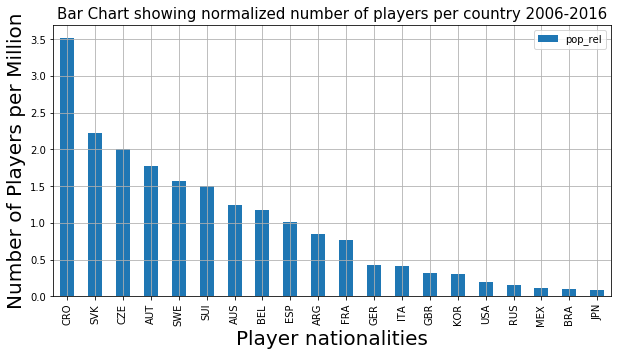

In [26]:
#plotting bar chart for number of players per country 2006-2016
no_players_06_16.plot(x = 'winner_ioc', y = 'player_num', kind = 'bar', figsize = (10,5))
plt.xlabel('Player nationalities', fontsize=20)
plt.ylabel('Number of Players', fontsize=20)
plt.grid(True)
plt.title('Bar Chart showing number of players per country 2006-2016', fontsize=15)

#plotting bar chart for normalized number of players per country 2006-2016
rel_06_16.plot(x = 'winner_ioc', y = 'pop_rel', kind = 'bar', figsize = (10,5))
plt.xlabel('Player nationalities', fontsize=20)
plt.ylabel('Number of Players per Million', fontsize=20)
plt.grid(True)
plt.title('Bar Chart showing normalized number of players per country 2006-2016', fontsize=15)

* In 2006-2016, we see a rise in European winning players taking the top 6 spots in the chart. The rise is due to the fact that European players usually train on clay courts which, as we have said previously, is a slower court. 
* In clay courts the ball bounces higher thus giving the players more time to think about their shot and makes them much more skilled. Clay courts also make a more well rounded player allowing players to play well on all courts. Rafael Nadal is an example of a European player who has won a Grand Slam on all surfaces. 
* Croatia producing 3.5 players per million is an interesting result as they have a population smaller than Ireland. 
* What’s also interesting to see is Australia’s decline in players from 7 player per million in the 70’s to only 1 player per million presently.


#### Case Study: Australia's decline in players

Text(0.5,1,'Line Graph showing the decline in professional Aus tennis players')

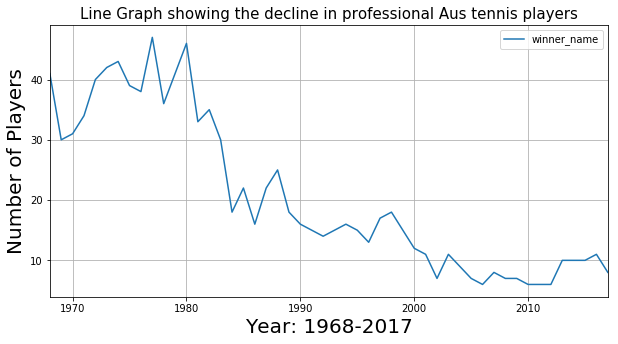

In [27]:
#plotting line graph showing decline in pro tennis players from Australia
Aus.plot(x = 'match_year', y = 'winner_name', kind = 'line', figsize = (10,5))
plt.xlabel('Year: 1968-2017', fontsize=20)
plt.ylabel('Number of Players', fontsize=20)
plt.grid(True)
plt.title('Line Graph showing the decline in professional Aus tennis players', fontsize=15)

We see the decline in Australian players from the 1980's. We feel this may be due to the foundation of the Australian Institue of Sport, founded in 1981, providing funding to other sports programs leaving tennis to plummit in popularity.